### 분류모델

### K-최근접 이웃

## API 불러오기

In [1]:
# 기본 API
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
sns.set()
%matplotlib inline

# 전처리 API
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# 경고메세지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 중간에 잘리는 컬럼없이 100개까지 Print / 소수점은 5번째까지
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.5f}'.format

In [3]:
# 모델적용 API
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [4]:
#폰트 설정
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\ROCC____.TTF',
 'C:\\Windows\\Fonts\\HANDotumB.ttf',
 'C:\\Windows\\Fonts\\ITCKRIST.TTF',
 'C:\\Windows\\Fonts\\ebrima.ttf',
 'C:\\Windows\\Fonts\\PERTIBD.TTF',
 'C:\\Windows\\Fonts\\PALSCRI.TTF',
 'C:\\Windows\\Fonts\\ARIALN.TTF',
 'C:\\Windows\\Fonts\\CHILLER.TTF',
 'C:\\Windows\\Fonts\\HYHWPEQ.TTF',
 'C:\\Windows\\Fonts\\pala.ttf',
 'C:\\Windows\\Fonts\\monbaiti.ttf',
 'C:\\Windows\\Fonts\\couri.ttf',
 'C:\\Windows\\Fonts\\phagspa.ttf',
 'C:\\Windows\\Fonts\\Candarai.ttf',
 'C:\\Windows\\Fonts\\corbel.ttf',
 'C:\\Windows\\Fonts\\NGULIM.TTF',
 'C:\\Windows\\Fonts\\BAUHS93.TTF',
 'C:\\Windows\\Fonts\\micross.ttf',
 'C:\\Windows\\Fonts\\courbd.ttf',
 'C:\\Windows\\Fonts\\palab.ttf',
 'C:\\Windows\\Fonts\\SCRIPTBL.TTF',
 'C:\\Windows\\Fonts\\ENGR.TTF',
 'C:\\Windows\\Fonts\\consolai.ttf',
 'C:\\Windows\\Fonts\\H2GTRE.TTF',
 'C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\taile.ttf',
 'C:\\Windows\\Fonts\\PRISTINA.TTF',
 'C

In [5]:
import platform 

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [135]:
# iris 데이터 로딩
from sklearn.datasets import load_iris
df = pd.read_csv("./iris.csv")

# 전처리
df['variety'] = df['variety'].map({"Setosa":1, "Versicolor":2, "Virginica":3})

# 독립, 종속 나누기
X = df.iloc[:,[0,1,2,3]]
y = df['variety'].values

# Define x and y
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [136]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [137]:
df.loc[:,['sepal.length', 'sepal.width']]

,sepal.length,sepal.width
0,5.10000,3.50000
1,4.90000,3.00000
2,4.70000,3.20000
3,4.60000,3.10000
4,5.00000,3.60000
...,...,...
145,6.70000,3.00000
146,6.30000,2.50000
147,6.50000,3.00000
148,6.20000,3.40000


## 의사결정 나무

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 의사결정나무 모델 생성
def DecisionTree(X_Train,X_Test,Y_Train,Y_Test):
    dtree = DecisionTreeClassifier(
        criterion='gini', # 변경할 수 있도록 변경 ('gini','entropy')
        splitter='best',
        max_depth=None, # 변경할 수 있도록 변경 (integer)
        min_samples_split=2, # 변경할 수 있도록 변경 (integer)
        min_samples_leaf=1, # 변경할 수 있도록 변경 (integer)
        min_weight_fraction_leaf=0.0,
        max_features=None,
        random_state=None,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_impurity_split=None,
        class_weight=None,
        presort='deprecated',
        ccp_alpha=0.0
    )
    # 의사결정 모델 적용
    dtree.fit(X_Train, Y_Train)
    # 예측값 생성
    dtreepred = dtree.predict(X_Test)
    
    return dtree, dtreepred

In [80]:
# 모델 불러오기
dtree, dtree_pred = DecisionTree(x_train,x_test,y_train,y_test)

In [81]:
# 분류 평가 matrix 
print("Decision_Tree Confusion_Matrix\n",confusion_matrix(y_test, dtree_pred))
# 분류 정확도
print("Decision_Tree Accuracy Score :",round(accuracy_score(y_test, dtree_pred),5)*100)
print("\n")
# 분류 평가지표
print("Decision_Tree Classification_Report\n", classification_report(y_test, dtree_pred))

Decision_Tree Confusion_Matrix
 [[12  0  0]
 [ 0  8  1]
 [ 0  1  8]]
Decision_Tree Accuracy Score : 93.333


Decision_Tree Classification_Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.89      0.89      0.89         9
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### KNeighborsClassifier 최적 K 찾기

In [7]:
# KNeighborsClassifier for find K
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

# K-Neightbor의 최적의 K찾기
## 분석에 앞서 확인항 사항
def find_K(X_Train, Y_Train):
    neighbors = np.arange(0,10) # K값의 범위를 더 보고 싶으면 값을 늘리면 됨.
    
    #Create empty list that will hold cv scores
    cv_scores = []
    
    #Perform 10-fold cross validation on training set for odd values of k:
    for k in neighbors:
        k_value = k+1
        knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
        kfold = model_selection.KFold(n_splits=5, random_state=123)
        scores = model_selection.cross_val_score(knn, X_Train, Y_Train, cv=kfold, scoring='accuracy')
        cv_scores.append(scores.mean()*100)
        print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
    print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

    plt.plot(neighbors, cv_scores)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Train Accuracy')
    plt.show()

k=1 95.83 (+/- 2.64)
k=2 95.83 (+/- 2.64)
k=3 96.67 (+/- 1.67)
k=4 97.50 (+/- 2.04)
k=5 97.50 (+/- 2.04)
k=6 95.83 (+/- 2.64)
k=7 96.67 (+/- 3.12)
k=8 95.83 (+/- 0.00)
k=9 96.67 (+/- 3.12)
k=10 95.83 (+/- 0.00)
The optimal number of neighbors is 3 with 97.5%


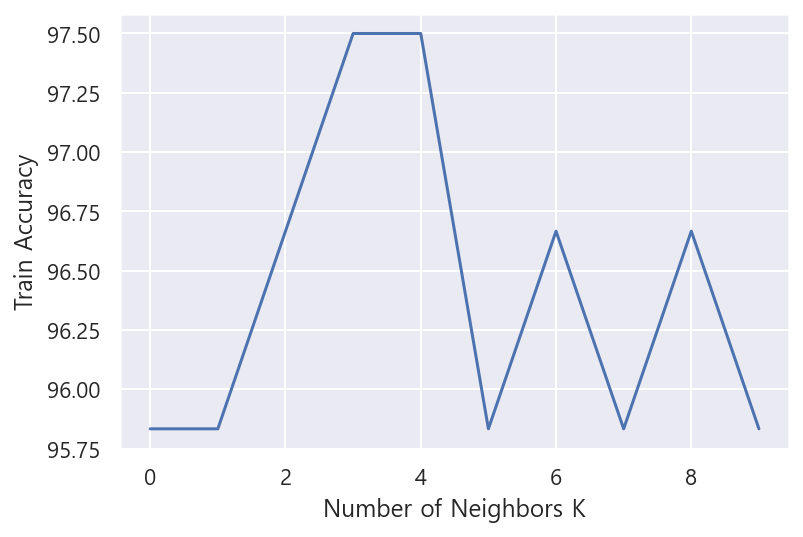

In [8]:
# K를 찾는 함수 부르기
find_K(x_train,y_train)

### KNeighborsClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# K-최근접 이웃 모델 생성
def KNeighbors(X_Train, X_Test, Y_Train,Y_Test,k):
    knn = KNeighborsClassifier(n_neighbors=k, # 변경할 수 있도록 수정 (integer)   default = 5                          
                               weights='uniform', # 변경할 수 있도록 수정 ('uniform','distance')
                               algorithm='auto', 
                               leaf_size=30, # 변경할 수 있도록 수정 (integer)
                               p=2,
                               metric='minkowski', # 변경할 수 있도록 수정(excel 문서 참조)
                               metric_params=None,
                               n_jobs=None)
    # 모델 적용
    knn.fit(X_Train, Y_Train)
    # 예측값 생성
    knnpred = knn.predict(X_Test)
    
    return knn, knnpred
    

In [10]:
# 모델 불러오기
knn, knn_pred = KNeighbors(x_train,x_test,y_train,y_test,3)

In [14]:
# 분류 평가 matrix 
print("K-Neighbors Confusion_Matrix\n",confusion_matrix(y_test, knn_pred))
# 분류 정확도
print("K-Neighbors Accuracy Score :",round(accuracy_score(y_test, knn_pred),5)*100)
print("\n")
# 분류 평가지표
print("K-neighbors Classification_Report\n", classification_report(y_test, knn_pred))

K-Neighbors Confusion_Matrix
 [[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
K-Neighbors Accuracy Score : 93.333


K-neighbors Classification_Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.78      0.88         9
           3       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



## 로지스틱 회귀분석

In [128]:
# iris 데이터 로딩
from sklearn.datasets import load_iris
df = pd.read_csv("./iris.csv")

# 전처리
df['variety'] = df['variety'].map({"Setosa":0, "Versicolor":1, "Virginica":0})

# 독립, 종속 나누기
X = df.iloc[:,[0,1,2,3]]
y = df['variety']

# Define x and y
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [129]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm

# 로지스틱 회귀분석 모델 생성
def Logistic_model(X_Train,X_Test,Y_Train,Y_Test):
    lg = LogisticRegression(
        penalty='l2', # 변경할 수 있도록 수정 ('l2','l1')
        dual=False,
        tol=0.0001, # 변경할 수 있도록 수정 (float)
        C=1.0, #  변경할 수 있도록 수정 (integer)
        fit_intercept=True,
        intercept_scaling=1,
        class_weight=None,
        random_state=None,
        solver='lbfgs',
        max_iter=100, # 변경할 수 있도록 수정 (integer)
        multi_class='auto',
        verbose=0,
        warm_start=False,
        n_jobs=None,
        l1_ratio=None # 변경할 수 있도록 수정 (float) 값의 범위 0-1
    )
    
    # 모델 적용
    lg.fit(X_Train, Y_Train)
    # 예측값 생성
    lg_pred = lg.predict(X_Test)
    
    return lg, lg_pred

# Logistic 이진분류 분석결과
## 위 결과는 이진분류에서만 사용되고 다중에서는 사용이 불가능
def Logistic(X,y):
    # 로짓회귀 모델 생성
    logit = sm.Logit(y,X)
    # 결과 보기
    result = logit.fit()
    
    # 결과 프린트
    print("Logistic Result\n", result.summary2())
    # 오즈비 결과
    print("Ozz Ratio\n", result.params) # 오즈비로 1을  기준으로 큰지 작은지에 따라 영향력이다름 10과 0.1은 동일하다고 봄. 

In [111]:
lg, lg_pred = Logistic_model(x_train,x_test,y_train,y_test)

In [112]:
# 분류 평가 matrix 
print("K-Neighbors Confusion_Matrix\n",confusion_matrix(y_test, lg_pred))
# 분류 정확도
print("K-Neighbors Accuracy Score :",round(accuracy_score(y_test, lg_pred),5)*100)
print("\n")
# 분류 평가지표
print("K-neighbors Classification_Report\n", classification_report(y_test, lg_pred))

K-Neighbors Confusion_Matrix
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
K-Neighbors Accuracy Score : 97.77799999999999


K-neighbors Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [133]:
# 로짓 회귀 결과 부르기
Logistic(X,y)

Optimization terminated successfully.
         Current function value: 0.516349
         Iterations 6
Logistic Result
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.189     
Dependent Variable: variety          AIC:              162.9047  
Date:               2021-02-17 12:21 BIC:              174.9472  
No. Observations:   150              Log-Likelihood:   -77.452   
Df Model:           3                LL-Null:          -95.477   
Df Residuals:       146              LLR p-value:      7.3099e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sepal.length   0.7490    0.5392   1.3891  0.1648  -0.3078   1.8059
sepal.width   -1.8946    0.6492  -2.9182  0.0

- 오즈비 결과 petal_width가 1 증가할때마다 -2.9배 증가
- 1과 가장 떨어져있는 petal_width가 가장 영향력이 크다고 봄

## SVM

In [66]:
from sklearn import svm

# SVM 모델 생성
def svm_model(x_train,x_test,y_train,y_test):
    svm_model = svm.SVC(
        C=1.0, # 변경할 수 있도록 변경 (float)
        kernel='rbf', # 변경할 수 있도록 변경 (excel 참조)
        degree=3,
        gamma='scale', # 변경할 수 있도록 변경 (float)
        coef0=0.0,
        shrinking=True,
        probability=False,
        tol=0.001, # 변경할 수 있도록 변경 (float)
        cache_size=200,
        class_weight=None,
        verbose=False,
        max_iter=-1,
        decision_function_shape='ovr',
        break_ties=False,
        random_state=None
    )
    # 모델 적용
    svm_model.fit(x_train,y_train)
    # 예측값 생성
    svm_pred=  svm_model.predict(x_test)
    
    return svm_model, svm_pred

In [68]:
# 모델 불러오기
svm, svm_pred = svm_model(x_train,x_test,y_train,y_test)

In [69]:
# 분류 평가 matrix 
print("SVM Confusion_Matrix\n",confusion_matrix(y_test, svm_pred))
# 분류 정확도
print("SVM Accuracy Score :",round(accuracy_score(y_test, svm_pred),5)*100)
print("\n")
# 분류 평가지표
print("SVM Classification_Report\n", classification_report(y_test, svm_pred))

SVM Confusion_Matrix
 [[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
SVM Accuracy Score : 100.0


SVM Classification_Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## XGBClassifier

- XGB 사이트와 파이썬에서 구동되는 모델의 파라미터 default값과 파라미터 사이에 약간의 간극이 존재
- XGB는 차후에 개발과 논의

In [82]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# XGBClassifier 모델 적용
def XGB(X_Train, X_Test, Y_Train, Y_Test):
    xgb = XGBClassifier(base_score=0.5,
                        booster='gbtree',
                        colsample_bylevel=1,
                        colsample_bynode=1,
                        colsample_bytree=1,
                        gamma=0, # 변경할 수 있도록 변경 (float)
                        learning_rate=0.1, # 변경할 수 있도록 변경 (float)
                        max_delta_step=0,
                        max_depth=3, # 변경할 수 있도록 변경 (integer)
                        min_child_weight=1, # 변경할 수 있도록 변경 (integer)
                        missing=None,
                        n_estimators=100, # 변경할 수 있도록 변경
                        n_jobs=1,
                        nthread=None,
                        objective='binary:logistic',
                        random_state=0,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        seed=None,
                        silent=None,
                        subsample=1,
                        verbosity=1
                       )
    # 모델 적용
    xgb.fit(X_Train, Y_Train)
    # 예측값 생성
    xgbpred = xgb.predict(X_Test)
    
    return xgb, xgbpred

In [71]:
xgb = XGBClassifier(base_score=None,
                    booster=None,
                    colsample_bylevel=None,
                    colsample_bynode=None,
                    colsample_bytree=None,
                    gamma=None,
                    gpu_id=None,
                    importance_type='gain',
                    interaction_constraints=None,
                    learning_rate=None,
                    max_delta_step=None,
                    max_depth=None,
                    min_child_weight=None,
                    missing=nan,
                    monotone_constraints=None,
                    n_estimators=100,
                    n_jobs=None,
                    num_parallel_tree=None,
                    random_state=None,
                    reg_alpha=None,
                    reg_lambda=None,
                    scale_pos_weight=None,
                    subsample=None,
                    tree_method=None,
                    validate_parameters=None,
                    verbosity=None)

In [72]:
print(xgb)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [134]:
# 모델 불러오기
xgb, xgb_pred = XGB(x_train,x_test,y_train,y_test)

[12:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
# 분류 평가 matrix 
print("XGB Confusion_Matrix\n",confusion_matrix(y_test, xgb_pred))
# 분류 정확도
print("XGB Accuracy Score :",round(accuracy_score(y_test, xgb_pred),5)*100)
print("\n")
# 분류 평가지표
print("XGB Classification_Report\n", classification_report(y_test, xgb_pred))

SVM Confusion_Matrix
 [[12  0  0]
 [ 0  8  1]
 [ 0  1  8]]
SVM Accuracy Score : 93.333


SVM Classification_Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.89      0.89      0.89         9
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

